In [2]:
import pandas  as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.preprocessing import StandardScaler , LabelEncoder
from sklearn.cluster import KMeans
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN

In [3]:
df=pd.read_excel('body_measurements_dataset_with_user_id.xlsx')

In [4]:
df

Gender Height  Weight  Bust/Chest Cup Size  Waist  Hips  \
0    Female   5'1"      67          37        E     35    38   
1      Male   6'1"      85          40      NaN     30    31   
2      Male   5'3"      77          44      NaN     36    42   
3      Male   6'4"      74          38      NaN     48    49   
4      Male  4'11"      47          35      NaN     39    41   
..      ...    ...     ...         ...      ...    ...   ...   
995  Female   5'2"      70          40       DD     34    36   
996  Female   5'6"      84          47        F     36    38   
997    Male   6'4"      73          47      NaN     31    38   
998  Female   5'1"      45          34        E     25    29   
999    Male   6'5"      89          32      NaN     35    39   

     Body Shape Index  user_id  
0                   4        1  
1                   3        2  
2                   4        3  
3                   4        4  
4                   0        5  
..                ...      ...  
995                 3      996  
996                 0      997  
997                 2      998  
998                 1      999  
999                 3     1000  

[1000 rows x 9 columns]

# Dropping User ID Column for Now

In [5]:
df.drop('user_id',axis=1,inplace=True)

In [6]:
df

Gender Height  Weight  Bust/Chest Cup Size  Waist  Hips  Body Shape Index
0    Female   5'1"      67          37        E     35    38                 4
1      Male   6'1"      85          40      NaN     30    31                 3
2      Male   5'3"      77          44      NaN     36    42                 4
3      Male   6'4"      74          38      NaN     48    49                 4
4      Male  4'11"      47          35      NaN     39    41                 0
..      ...    ...     ...         ...      ...    ...   ...               ...
995  Female   5'2"      70          40       DD     34    36                 3
996  Female   5'6"      84          47        F     36    38                 0
997    Male   6'4"      73          47      NaN     31    38                 2
998  Female   5'1"      45          34        E     25    29                 1
999    Male   6'5"      89          32      NaN     35    39                 3

[1000 rows x 8 columns]

# EDA Analysis

In [20]:
from ydata_profiling import ProfileReport

In [21]:
Profile=ProfileReport(df,title='EDA Grid')

In [25]:
Profile.to_notebook_iframe()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

## Proceeding to Encoding and Handling to Nill Values

In [26]:
df

Gender Height  Weight  Bust/Chest Cup Size  Waist  Hips  Body Shape Index
0    Female   5'1"      67          37        E     35    38                 4
1      Male   6'1"      85          40      NaN     30    31                 3
2      Male   5'3"      77          44      NaN     36    42                 4
3      Male   6'4"      74          38      NaN     48    49                 4
4      Male  4'11"      47          35      NaN     39    41                 0
..      ...    ...     ...         ...      ...    ...   ...               ...
995  Female   5'2"      70          40       DD     34    36                 3
996  Female   5'6"      84          47        F     36    38                 0
997    Male   6'4"      73          47      NaN     31    38                 2
998  Female   5'1"      45          34        E     25    29                 1
999    Male   6'5"      89          32      NaN     35    39                 3

[1000 rows x 8 columns]

In [7]:
le=LabelEncoder()

df['Gender']=le.fit_transform(df['Gender'])

In [8]:
print(le.classes_)

['Female' 'Male']


In [9]:
#0=female and 1=Male

In [10]:
df

Gender Height  Weight  Bust/Chest Cup Size  Waist  Hips  Body Shape Index
0         0   5'1"      67          37        E     35    38                 4
1         1   6'1"      85          40      NaN     30    31                 3
2         1   5'3"      77          44      NaN     36    42                 4
3         1   6'4"      74          38      NaN     48    49                 4
4         1  4'11"      47          35      NaN     39    41                 0
..      ...    ...     ...         ...      ...    ...   ...               ...
995       0   5'2"      70          40       DD     34    36                 3
996       0   5'6"      84          47        F     36    38                 0
997       1   6'4"      73          47      NaN     31    38                 2
998       0   5'1"      45          34        E     25    29                 1
999       1   6'5"      89          32      NaN     35    39                 3

[1000 rows x 8 columns]

In [11]:
df['Cup Size'] = df['Cup Size'].fillna('N/A')

In [12]:
df

Gender Height  Weight  Bust/Chest Cup Size  Waist  Hips  Body Shape Index
0         0   5'1"      67          37        E     35    38                 4
1         1   6'1"      85          40      N/A     30    31                 3
2         1   5'3"      77          44      N/A     36    42                 4
3         1   6'4"      74          38      N/A     48    49                 4
4         1  4'11"      47          35      N/A     39    41                 0
..      ...    ...     ...         ...      ...    ...   ...               ...
995       0   5'2"      70          40       DD     34    36                 3
996       0   5'6"      84          47        F     36    38                 0
997       1   6'4"      73          47      N/A     31    38                 2
998       0   5'1"      45          34        E     25    29                 1
999       1   6'5"      89          32      N/A     35    39                 3

[1000 rows x 8 columns]

## Extracting Dataset For Women and Men

In [13]:
women_df = df[df['Gender'] == 0]

women_df = women_df.drop(columns=['Gender'])

print(women_df.head())

   Height  Weight  Bust/Chest Cup Size  Waist  Hips  Body Shape Index
0    5'1"      67          37        E     35    38                 4
5    6'4"      97          37        E     28    34                 0
6    5'9"      70          33       DD     23    23                 0
8    5'1"      59          41        D     25    26                 0
12  5'11"      92          42       DD     24    26                 4


In [14]:
women_df

Height  Weight  Bust/Chest Cup Size  Waist  Hips  Body Shape Index
0     5'1"      67          37        E     35    38                 4
5     6'4"      97          37        E     28    34                 0
6     5'9"      70          33       DD     23    23                 0
8     5'1"      59          41        D     25    26                 0
12   5'11"      92          42       DD     24    26                 4
..     ...     ...         ...      ...    ...   ...               ...
989   5'3"      54          45        A     29    37                 4
994   5'0"      59          30        A     28    31                 4
995   5'2"      70          40       DD     34    36                 3
996   5'6"      84          47        F     36    38                 0
998   5'1"      45          34        E     25    29                 1

[525 rows x 7 columns]

In [39]:
Profile=ProfileReport(women_df,title='EDA GridW')

In [40]:
Profile.to_notebook_iframe()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [41]:
women_df

Height  Weight  Bust/Chest Cup Size  Waist  Hips  Body Shape Index
0     5'1"      67          37        E     35    38                 4
5     6'4"      97          37        E     28    34                 0
6     5'9"      70          33       DD     23    23                 0
8     5'1"      59          41        D     25    26                 0
12   5'11"      92          42       DD     24    26                 4
..     ...     ...         ...      ...    ...   ...               ...
989   5'3"      54          45        A     29    37                 4
994   5'0"      59          30        A     28    31                 4
995   5'2"      70          40       DD     34    36                 3
996   5'6"      84          47        F     36    38                 0
998   5'1"      45          34        E     25    29                 1

[525 rows x 7 columns]

In [15]:
# Function to convert a height string like "5'1"" to centimeters and return as an integer
def height_to_cm(height_str):
    # Split the string into feet and inches
    feet, inches = height_str.split("'")
    inches = inches.replace('"', '')  # Remove the double quote
    # Convert to centimeters and round to nearest integer
    total_cm = int(feet) * 30 + int(inches) * 2.54
    return int(total_cm)

# Apply the function to the entire 'Height' column
women_df['Height'] = women_df['Height'].apply(height_to_cm)

# Check the updated DataFrame
print(women_df['Height'])

0      152
5      190
6      172
8      152
12     177
      ... 
989    157
994    150
995    155
996    165
998    152
Name: Height, Length: 525, dtype: int64


In [46]:
# def height_to_cm(height_str):
#     # Split the string into feet and inches
#     feet, inches = height_str.split("'")
#     inches = inches.replace('"', '')  # Remove the double quote
#     # Convert to centimeters
#     total_cm = int(feet) * 30.48 + int(inches) * 2.54
#     return total_cm

# # Apply the function to the entire 'Height' column
# women_df['Height'] = women_df['Height'].apply(height_to_cm)

# # Check the updated DataFrame
# print(women_df['Height'])

In [16]:
women_df

Height  Weight  Bust/Chest Cup Size  Waist  Hips  Body Shape Index
0       152      67          37        E     35    38                 4
5       190      97          37        E     28    34                 0
6       172      70          33       DD     23    23                 0
8       152      59          41        D     25    26                 0
12      177      92          42       DD     24    26                 4
..      ...     ...         ...      ...    ...   ...               ...
989     157      54          45        A     29    37                 4
994     150      59          30        A     28    31                 4
995     155      70          40       DD     34    36                 3
996     165      84          47        F     36    38                 0
998     152      45          34        E     25    29                 1

[525 rows x 7 columns]

In [47]:
women_df.to_excel('wdf.xlsx', index=False)

In [17]:
women_df1=pd.read_excel('wdf1 .xlsx')

In [18]:
women_df1

Height  Weight  Bust/Chest  Cup Size  Waist  Hips  Body Shape Index
0    154.94      67          37        95     35    38                 4
1    193.04      97          37        93     28    34                 0
2    175.26      70          33        93     23    23                 0
3    154.94      59          41        87     25    26                 0
4    180.34      92          42        93     24    26                 4
..      ...     ...         ...       ...    ...   ...               ...
520  160.02      54          45        77     29    37                 4
521  152.40      59          30        73     28    31                 4
522  157.48      70          40        94     34    36                 3
523  167.64      84          47        96     36    38                 0
524  154.94      45          34        91     25    29                 1

[525 rows x 7 columns]

In [19]:
women_df2=women_df1

In [20]:
women_df2

Height  Weight  Bust/Chest  Cup Size  Waist  Hips  Body Shape Index
0    154.94      67          37        95     35    38                 4
1    193.04      97          37        93     28    34                 0
2    175.26      70          33        93     23    23                 0
3    154.94      59          41        87     25    26                 0
4    180.34      92          42        93     24    26                 4
..      ...     ...         ...       ...    ...   ...               ...
520  160.02      54          45        77     29    37                 4
521  152.40      59          30        73     28    31                 4
522  157.48      70          40        94     34    36                 3
523  167.64      84          47        96     36    38                 0
524  154.94      45          34        91     25    29                 1

[525 rows x 7 columns]

## Clustering

In [21]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
from sklearn.metrics import silhouette_score, davies_bouldin_score
from sklearn.model_selection import GridSearchCV
import numpy as np

In [22]:
scaler = StandardScaler()
women_df_scaled = scaler.fit_transform(women_df1)

In [23]:
women_df_scaled

array([[-1.15122796, -0.30921437, -0.0355175 , ...,  0.53984938,
         0.13631588,  1.41894419],
       [ 1.34558289,  1.51617031, -0.0355175 , ..., -0.65171007,
        -0.44552021, -1.41624401],
       [ 0.18040449, -0.1266759 , -0.72613565, ..., -1.50282396,
        -2.04556945, -1.41624401],
       ...,
       [-0.9847739 , -0.1266759 ,  0.4824461 , ...,  0.36962661,
        -0.15460216,  0.71014714],
       [-0.31895768,  0.72517028,  1.69102785, ...,  0.71007216,
         0.13631588, -1.41624401],
       [-1.15122796, -1.64782981, -0.55348111, ..., -1.1623784 ,
        -1.17281532, -0.70744696]])

## Clustering

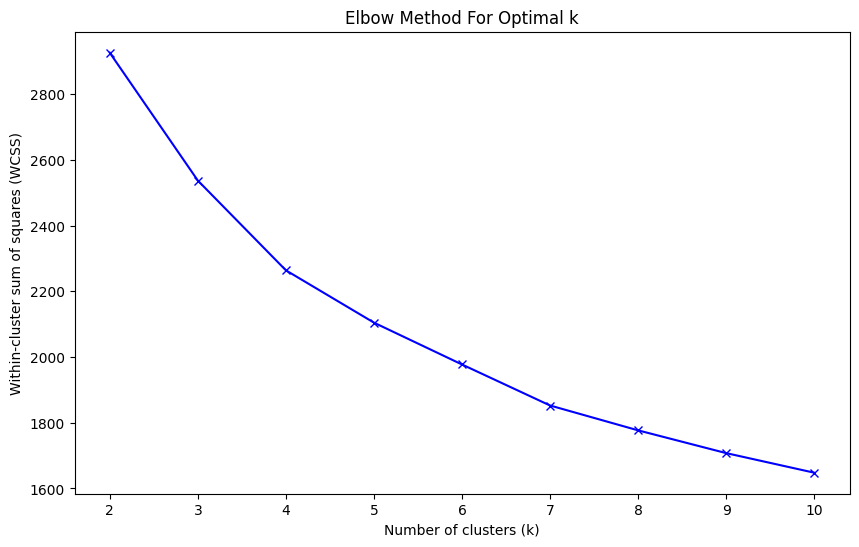

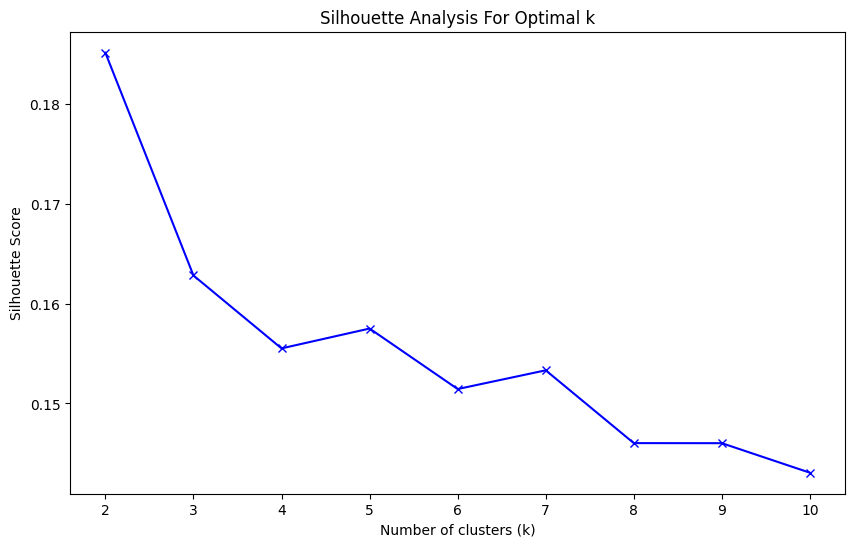

In [55]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Step 2: Elbow Method and Silhouette Analysis
wcss = []  # Within-cluster sum of squares
silhouette_scores = []
K = range(2, 11)

for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(women_df_scaled)
    wcss.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(women_df_scaled, kmeans.labels_))

# Plotting the Elbow Method
plt.figure(figsize=(10, 6))
plt.plot(K, wcss, 'bx-')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Within-cluster sum of squares (WCSS)')
plt.title('Elbow Method For Optimal k')
plt.show()

# Plotting Silhouette Scores
plt.figure(figsize=(10, 6))
plt.plot(K, silhouette_scores, 'bx-')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Analysis For Optimal k')
plt.show()


In [56]:
# Choose the best k based on the Silhouette Analysis
optimal_k = K[silhouette_scores.index(max(silhouette_scores))]
print(f"Optimal number of clusters based on Silhouette Analysis: {optimal_k}")

Optimal number of clusters based on Silhouette Analysis: 2


In [57]:
#After Considering all Test 
optimal_k=3

In [58]:
# Step 4: Apply K-Means with the optimal number of clusters
best_kmeans = KMeans(n_clusters=optimal_k, random_state=42)
best_kmeans.fit(women_df_scaled)
kmeans_labels = best_kmeans.labels_

In [59]:
from sklearn.metrics import davies_bouldin_score

# Step 5: Evaluate the best K-Means model
kmeans_sil_score = silhouette_score(women_df_scaled, kmeans_labels)
kmeans_db_score = davies_bouldin_score(women_df_scaled, kmeans_labels)

print(f"K-Means with optimal k={optimal_k}")
print(f"Silhouette Score: {kmeans_sil_score}")
print(f"Davies-Bouldin Score: {kmeans_db_score}")


K-Means with optimal k=3
Silhouette Score: 0.16280959670959938
Davies-Bouldin Score: 1.7640315492855239


In [61]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer, silhouette_score
from sklearn.cluster import KMeans

# Create a custom scorer using the silhouette_score
silhouette_scorer = make_scorer(silhouette_score, metric='euclidean')

# Define the parameter grid for GridSearchCV
param_grid = {
    'n_clusters': range(optimal_k-1, optimal_k+2),  # Fine-tuning around the optimal k
    'init': ['k-means++', 'random'],  # Different initialization methods
    'n_init': [10, 20, 30],  # Number of times the algorithm will run with different initial centroid seeds
    'max_iter': [300, 500, 1000]  # Maximum number of iterations for a single run
}

# Initialize GridSearchCV with the custom scorer
grid_search = GridSearchCV(KMeans(random_state=42), param_grid, cv=5, scoring=silhouette_scorer, n_jobs=-1)
grid_search.fit(women_df_scaled)

# Best K-Means model from Grid Search
best_kmeans_tuned = grid_search.best_estimator_
tuned_labels = best_kmeans_tuned.labels_

# Evaluate the tuned K-Means model
tuned_sil_score = silhouette_score(women_df_scaled, tuned_labels)
tuned_db_score = davies_bouldin_score(women_df_scaled, tuned_labels)

print(f"Best Parameters from Grid Search: {grid_search.best_params_}")
print(f"Tuned K-Means Silhouette Score: {tuned_sil_score}")
print(f"Tuned K-Means Davies-Bouldin Score: {tuned_db_score}")


Best Parameters from Grid Search: {'init': 'k-means++', 'max_iter': 300, 'n_clusters': 2, 'n_init': 10}
Tuned K-Means Silhouette Score: 0.1851121802997333
Tuned K-Means Davies-Bouldin Score: 1.9295889444751821


C:\Users\Lenovo\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_search.py:1051: UserWarning: One or more of the test scores are non-finite: [nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan]
  warnings.warn(


In [62]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import make_scorer, silhouette_score
from sklearn.cluster import KMeans
import numpy as np

# Custom Silhouette Scorer
silhouette_scorer = make_scorer(silhouette_score, metric='euclidean')

# Expanded Parameter Grid
param_dist = {
    'n_clusters': range(2, 11),  # Explore a wider range of clusters
    'init': ['k-means++', 'random'],  # Different initialization methods
    'n_init': [10, 20, 30, 50],  # Different numbers of initializations
    'max_iter': [300, 500, 1000],  # Maximum iterations
    'tol': [1e-4, 1e-3, 1e-2],  # Tolerance for convergence
    'algorithm': ['auto', 'full', 'elkan']  # Different algorithms for K-Means
}

# Randomized Search CV with 100 iterations
random_search = RandomizedSearchCV(
    KMeans(random_state=42),
    param_distributions=param_dist,
    n_iter=100,  # Number of parameter settings that are sampled
    scoring=silhouette_scorer,
    cv=10,  # 10-fold cross-validation for more robust results
    random_state=42,
    n_jobs=-1
)

# Fit RandomizedSearchCV
random_search.fit(women_df_scaled)

# Extract the best estimator and parameters
best_kmeans_advanced = random_search.best_estimator_
tuned_labels_advanced = best_kmeans_advanced.labels_

# Evaluate the advanced tuned K-Means model
tuned_sil_score_advanced = silhouette_score(women_df_scaled, tuned_labels_advanced)
tuned_db_score_advanced = davies_bouldin_score(women_df_scaled, tuned_labels_advanced)

print(f"Best Parameters from Advanced Tuning: {random_search.best_params_}")
print(f"Advanced Tuned K-Means Silhouette Score: {tuned_sil_score_advanced}")
print(f"Advanced Tuned K-Means Davies-Bouldin Score: {tuned_db_score_advanced}")


C:\Users\Lenovo\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_validation.py:547: FitFailedWarning: 
620 fits failed out of a total of 1000.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
133 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Lenovo\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_validation.py", line 893, in _fit_and_score
    estimator.fit(X_train, **fit_params)
  File "C:\Users\Lenovo\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py", line 1467, in wrapper
    estimator._validate_params()
  File "C:\Users\Lenovo\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py"

Best Parameters from Advanced Tuning: {'tol': 0.01, 'n_init': 10, 'n_clusters': 10, 'max_iter': 1000, 'init': 'k-means++', 'algorithm': 'elkan'}
Advanced Tuned K-Means Silhouette Score: 0.1619391062042271
Advanced Tuned K-Means Davies-Bouldin Score: 1.5032325670972893


In [64]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import make_scorer, silhouette_score
from sklearn.cluster import KMeans
import numpy as np

# Custom Silhouette Scorer
silhouette_scorer = make_scorer(silhouette_score, metric='euclidean')

# Corrected Parameter Grid
param_dist = {
    'n_clusters': range(2, 7),  # Focusing on a smaller number of clusters
    'init': ['k-means++', 'random'],  # Different initialization methods
    'n_init': [10, 20, 30, 50],  # Different numbers of initializations
    'max_iter': [300, 500, 1000],  # Maximum iterations
    'tol': [1e-4, 1e-3, 1e-2],  # Tolerance for convergence
    'algorithm': ['lloyd', 'elkan']  # Only valid algorithms for K-Means
}

# Randomized Search CV with 100 iterations
random_search = RandomizedSearchCV(
    KMeans(random_state=42),
    param_distributions=param_dist,
    n_iter=100,  # Number of parameter settings that are sampled
    scoring=silhouette_scorer,
    cv=10,  # 10-fold cross-validation for more robust results
    random_state=42,
    n_jobs=-1
)

# Fit RandomizedSearchCV
random_search.fit(women_df_scaled)

# Extract the best estimator and parameters
best_kmeans_refined = random_search.best_estimator_
tuned_labels_refined = best_kmeans_refined.labels_

# Evaluate the refined K-Means model
tuned_sil_score_refined = silhouette_score(women_df_scaled, tuned_labels_refined)
tuned_db_score_refined = davies_bouldin_score(women_df_scaled, tuned_labels_refined)

print(f"Best Parameters from Refined Tuning: {random_search.best_params_}")
print(f"Refined Tuned K-Means Silhouette Score: {tuned_sil_score_refined}")
print(f"Refined Tuned K-Means Davies-Bouldin Score: {tuned_db_score_refined}")


Best Parameters from Refined Tuning: {'tol': 0.001, 'n_init': 20, 'n_clusters': 5, 'max_iter': 1000, 'init': 'random', 'algorithm': 'lloyd'}
Refined Tuned K-Means Silhouette Score: 0.15469788599737588
Refined Tuned K-Means Davies-Bouldin Score: 1.685222668379772


## DBSCAN

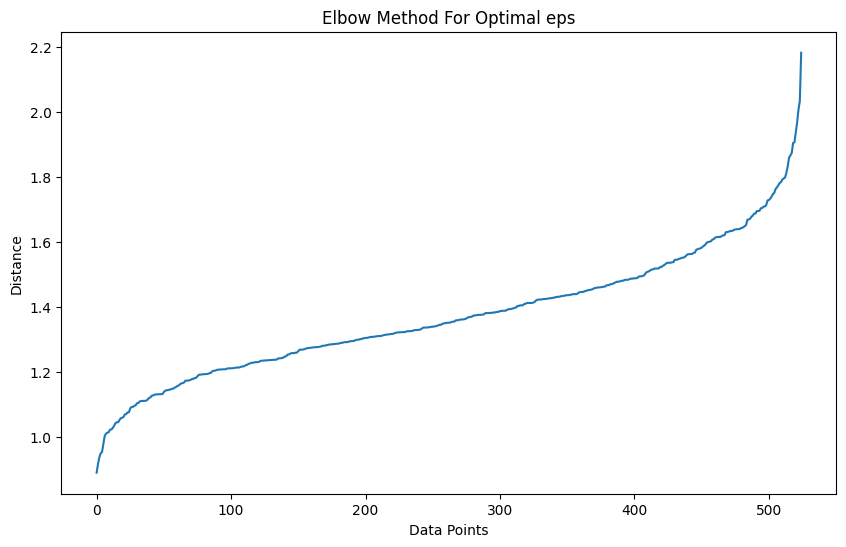

In [65]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score, davies_bouldin_score
from sklearn.neighbors import NearestNeighbors
from sklearn.model_selection import GridSearchCV

# Step 1: Determine Initial 'eps' using Nearest Neighbors
neighbors = NearestNeighbors(n_neighbors=5)  # Use k+1 where k is the min_samples
neighbors_fit = neighbors.fit(women_df_scaled)
distances, indices = neighbors_fit.kneighbors(women_df_scaled)
distances = np.sort(distances[:, 4], axis=0)  # 4 because k=5-1
plt.figure(figsize=(10, 6))
plt.plot(distances)
plt.title('Elbow Method For Optimal eps')
plt.xlabel('Data Points')
plt.ylabel('Distance')
plt.show()

# Based on the plot, choose an initial 'eps' estimate (typically where the plot shows an elbow

In [66]:
# Step 2: DBSCAN Clustering with Initial Estimates
initial_eps = distances[int(0.9 * len(distances))]  # Example, choose based on the elbow plot
dbscan = DBSCAN(eps=initial_eps, min_samples=5)  # Start with a basic min_samples
dbscan_labels = dbscan.fit_predict(women_df_scaled)

# Evaluate Initial DBSCAN
initial_silhouette = silhouette_score(women_df_scaled, dbscan_labels)
initial_db_score = davies_bouldin_score(women_df_scaled, dbscan_labels)

print(f"Initial DBSCAN Silhouette Score: {initial_silhouette}")
print(f"Initial DBSCAN Davies-Bouldin Score: {initial_db_score}")

# Step 3: Grid Search for Hyperparameter Tuning
param_grid = {
    'eps': np.arange(0.1, 1.0, 0.1),  # Adjust this range based on the initial analysis
    'min_samples': range(3, 10)
}

# Custom scorer using silhouette score
silhouette_scorer = make_scorer(silhouette_score)

# Perform Grid Search
grid_search = GridSearchCV(DBSCAN(), param_grid, scoring=silhouette_scorer, cv=5, n_jobs=-1)
grid_search.fit(women_df_scaled)

# Best DBSCAN Model from Grid Search
best_dbscan = grid_search.best_estimator_
best_dbscan_labels = best_dbscan.labels_

# Evaluate the Tuned DBSCAN Model
tuned_silhouette_score = silhouette_score(women_df_scaled, best_dbscan_labels)
tuned_db_score = davies_bouldin_score(women_df_scaled, best_dbscan_labels)

print(f"Best Parameters for DBSCAN: {grid_search.best_params_}")
print(f"Tuned DBSCAN Silhouette Score: {tuned_silhouette_score}")
print(f"Tuned DBSCAN Davies-Bouldin Score: {tuned_db_score}")

# Optionally, plot the clusters for visualization if needed
plt.figure(figsize=(10, 6))
plt.scatter(women_df_scaled[:, 0], women_df_scaled[:, 1], c=best_dbscan_labels, cmap='viridis')
plt.title('DBSCAN Clustering Results')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

Initial DBSCAN Silhouette Score: 0.1794110970392916
Initial DBSCAN Davies-Bouldin Score: 4.887413516633267


C:\Users\Lenovo\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_search.py:1051: UserWarning: One or more of the test scores are non-finite: [nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan]
  warnings.warn(


ValueError: Number of labels is 1. Valid values are 2 to n_samples - 1 (inclusive)

In [67]:
# Try a lower 'eps' value based on the initial analysis
lower_eps = 1.0  # Lower than the initial estimate
dbscan = DBSCAN(eps=lower_eps, min_samples=5)
dbscan_labels = dbscan.fit_predict(women_df_scaled)

# Check the number of clusters formed
num_clusters = len(set(dbscan_labels)) - (1 if -1 in dbscan_labels else 0)
print(f"Number of clusters formed: {num_clusters}")

if num_clusters > 1:
    # Evaluate DBSCAN if it finds more than one cluster
    silhouette = silhouette_score(women_df_scaled, dbscan_labels)
    db_score = davies_bouldin_score(women_df_scaled, dbscan_labels)
    
    print(f"Adjusted DBSCAN Silhouette Score: {silhouette}")
    print(f"Adjusted DBSCAN Davies-Bouldin Score: {db_score}")
else:
    print("DBSCAN found only one cluster. Consider further adjusting eps or min_samples.")


Number of clusters formed: 5
Adjusted DBSCAN Silhouette Score: -0.2413930628445613
Adjusted DBSCAN Davies-Bouldin Score: 1.610719070583042


# H-Clustering

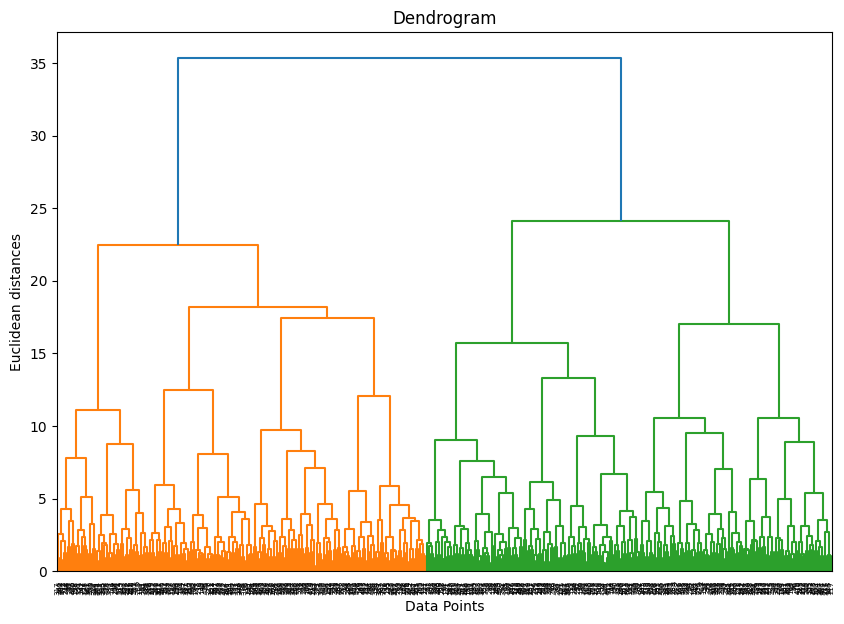

Initial Agglomerative Clustering Silhouette Score: 0.10237528896453572
Initial Agglomerative Clustering Davies-Bouldin Score: 2.034033526661143
Best Parameters for Agglomerative Clustering: {'linkage': 'single', 'n_clusters': 2}
Tuned Agglomerative Clustering Silhouette Score: 0.16213566622467687
Tuned Agglomerative Clustering Davies-Bouldin Score: 0.672884212949086


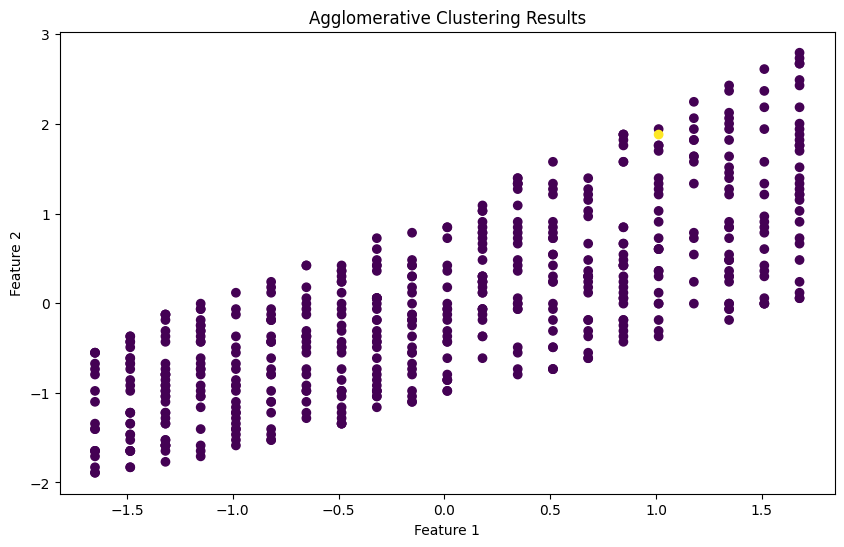

In [68]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score, davies_bouldin_score
from scipy.cluster.hierarchy import dendrogram, linkage
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import ParameterGrid

# Step 1: Generate Dendrogram for Initial Exploration
Z = linkage(women_df_scaled, method='ward')  # Use 'ward' for variance minimization
plt.figure(figsize=(10, 7))
dendrogram(Z)
plt.title('Dendrogram')
plt.xlabel('Data Points')
plt.ylabel('Euclidean distances')
plt.show()

# Step 2: Initial Agglomerative Clustering
initial_model = AgglomerativeClustering(n_clusters=5, linkage='ward')
initial_labels = initial_model.fit_predict(women_df_scaled)

# Evaluate Initial Clustering
initial_silhouette = silhouette_score(women_df_scaled, initial_labels)
initial_db_score = davies_bouldin_score(women_df_scaled, initial_labels)

print(f"Initial Agglomerative Clustering Silhouette Score: {initial_silhouette}")
print(f"Initial Agglomerative Clustering Davies-Bouldin Score: {initial_db_score}")

# Step 3: Hyperparameter Tuning using GridSearchCV
# We need to use a custom approach because AgglomerativeClustering doesn't directly support GridSearchCV

param_grid = {
    'n_clusters': range(2, 11),  # Test clusters between 2 and 10
    'linkage': ['ward', 'complete', 'average', 'single']  # Test different linkage methods
}

best_silhouette = -1
best_params = {}
best_model = None

for params in ParameterGrid(param_grid):
    model = AgglomerativeClustering(n_clusters=params['n_clusters'], linkage=params['linkage'])
    labels = model.fit_predict(women_df_scaled)
    
    silhouette_avg = silhouette_score(women_df_scaled, labels)
    db_score = davies_bouldin_score(women_df_scaled, labels)
    
    if silhouette_avg > best_silhouette:
        best_silhouette = silhouette_avg
        best_params = params
        best_model = model
        best_db_score = db_score

print(f"Best Parameters for Agglomerative Clustering: {best_params}")
print(f"Tuned Agglomerative Clustering Silhouette Score: {best_silhouette}")
print(f"Tuned Agglomerative Clustering Davies-Bouldin Score: {best_db_score}")

# Visualize the final clustering
plt.figure(figsize=(10, 6))
plt.scatter(women_df_scaled[:, 0], women_df_scaled[:, 1], c=best_model.labels_, cmap='viridis')
plt.title('Agglomerative Clustering Results')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()


Original dimensions: 7, Reduced dimensions: 5
Best Parameters for Agglomerative Clustering after PCA: {'linkage': 'single', 'n_clusters': 2}
Tuned Agglomerative Clustering Silhouette Score: 0.20319672412675183
Tuned Agglomerative Clustering Davies-Bouldin Score: 0.6242720926981117


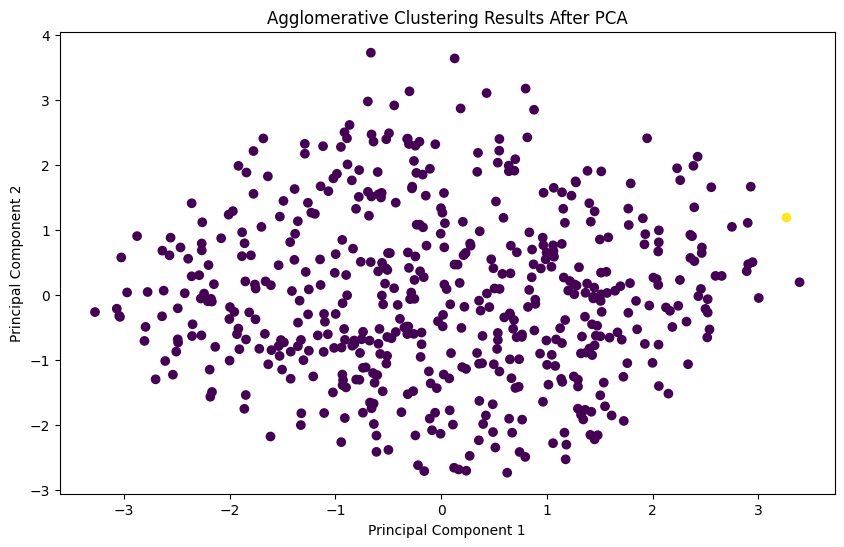

In [25]:
from sklearn.decomposition import PCA
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score, davies_bouldin_score
from sklearn.model_selection import ParameterGrid
import matplotlib.pyplot as plt

# Step 1: Apply PCA for Dimensionality Reduction
pca = PCA(n_components=0.95)  # Keep 95% of the variance
women_df_pca = pca.fit_transform(women_df_scaled)
print(f"Original dimensions: {women_df_scaled.shape[1]}, Reduced dimensions: {women_df_pca.shape[1]}")

# Step 2: Conduct a more advanced Grid Search
param_grid = {
    'n_clusters': range(2, 11),  # Exploring more clusters
    'linkage': ['ward', 'complete', 'average', 'single'],  # All linkage methods
}

best_silhouette = -1
best_params = {}
best_model = None

for params in ParameterGrid(param_grid):
    model = AgglomerativeClustering(n_clusters=params['n_clusters'], linkage=params['linkage'])
    labels = model.fit_predict(women_df_pca)
    
    silhouette_avg = silhouette_score(women_df_pca, labels)
    db_score = davies_bouldin_score(women_df_pca, labels)
    
    if silhouette_avg > best_silhouette:
        best_silhouette = silhouette_avg
        best_params = params
        best_model = model
        best_db_score = db_score

print(f"Best Parameters for Agglomerative Clustering after PCA: {best_params}")
print(f"Tuned Agglomerative Clustering Silhouette Score: {best_silhouette}")
print(f"Tuned Agglomerative Clustering Davies-Bouldin Score: {best_db_score}")

# Visualize the final clustering
plt.figure(figsize=(10, 6))
plt.scatter(women_df_pca[:, 0], women_df_pca[:, 1], c=best_model.labels_, cmap='viridis')
plt.title('Agglomerative Clustering Results After PCA')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()


Best Parameters after fine-tuning: {'linkage': 'single', 'n_clusters': 2}
Best Silhouette Score: 0.20319672412675183
Best Davies-Bouldin Score: 0.6242720926981117
Best Calinski-Harabasz Score: 2.431030276493024


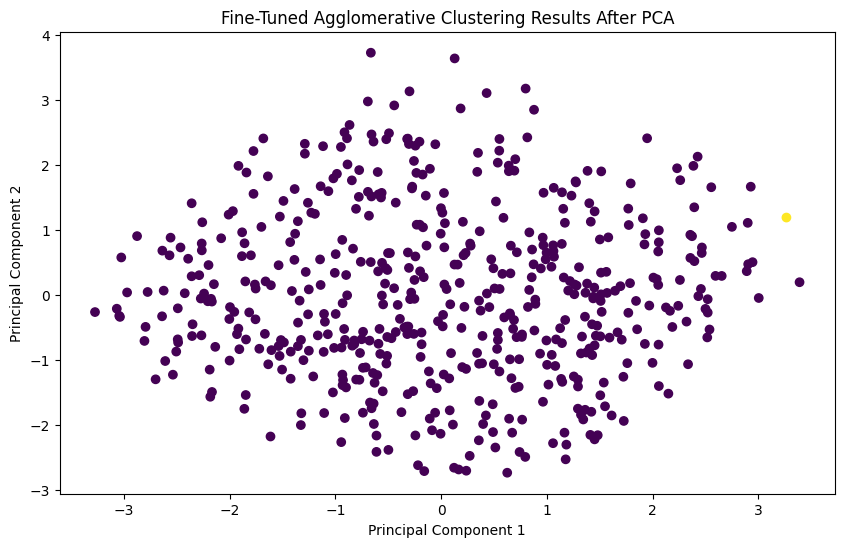

AttributeError: module 'matplotlib.pyplot' has no attribute 'axvlin'

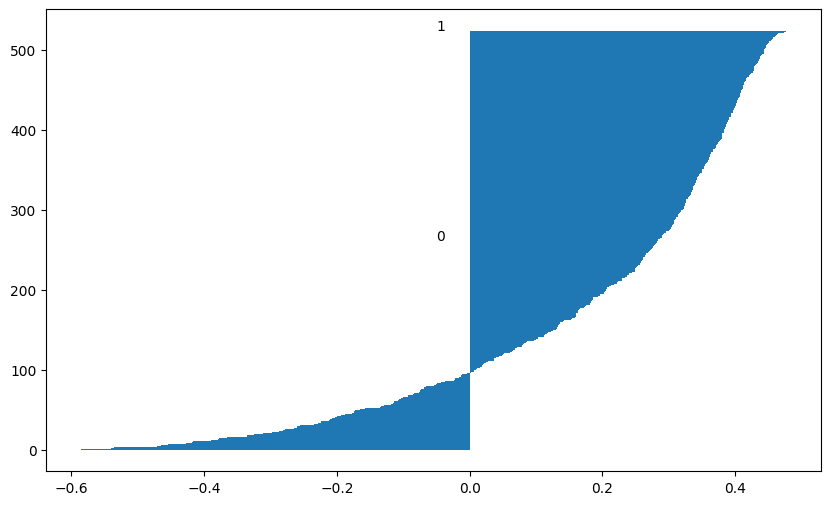

In [70]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score
from sklearn.model_selection import ParameterGrid
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Perform PCA (if not already done)
pca = PCA(n_components=0.95)  # Keep 95% of the variance
women_df_pca = pca.fit_transform(women_df_scaled)

# Step 2: Expanded Parameter Grid Search with additional metrics
param_grid = {
    'n_clusters': range(2, 6),  # Explore more clusters, 2 to 5
    'linkage': ['ward', 'complete', 'average', 'single'],  # All linkage methods
}

best_silhouette = -1
best_params = {}
best_model = None
best_db_score = float('inf')
best_ch_score = 0

for params in ParameterGrid(param_grid):
    model = AgglomerativeClustering(n_clusters=params['n_clusters'], linkage=params['linkage'])
    labels = model.fit_predict(women_df_pca)
    
    silhouette_avg = silhouette_score(women_df_pca, labels)
    db_score = davies_bouldin_score(women_df_pca, labels)
    ch_score = calinski_harabasz_score(women_df_pca, labels)
    
    # Use a combination of metrics to find the best clustering
    if silhouette_avg > best_silhouette and db_score < best_db_score:
        best_silhouette = silhouette_avg
        best_db_score = db_score
        best_ch_score = ch_score
        best_params = params
        best_model = model

print(f"Best Parameters after fine-tuning: {best_params}")
print(f"Best Silhouette Score: {best_silhouette}")
print(f"Best Davies-Bouldin Score: {best_db_score}")
print(f"Best Calinski-Harabasz Score: {best_ch_score}")

# Visualize the clustering results
plt.figure(figsize=(10, 6))
plt.scatter(women_df_pca[:, 0], women_df_pca[:, 1], c=best_model.labels_, cmap='viridis')
plt.title('Fine-Tuned Agglomerative Clustering Results After PCA')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

# Silhouette plot for the best model
from sklearn.metrics import silhouette_samples

plt.figure(figsize=(10, 6))
silhouette_vals = silhouette_samples(women_df_pca, best_model.labels_)
y_ticks = []
y_lower, y_upper = 0, 0

for i, cluster in enumerate(np.unique(best_model.labels_)):
    cluster_silhouette_vals = silhouette_vals[best_model.labels_ == cluster]
    cluster_silhouette_vals.sort()
    y_upper += len(cluster_silhouette_vals)
    plt.barh(range(y_lower, y_upper), cluster_silhouette_vals, height=1)
    plt.text(-0.05, (y_lower + y_upper) / 2, str(cluster))
    y_lower += len(cluster_silhouette_vals)
    
plt.axvlin


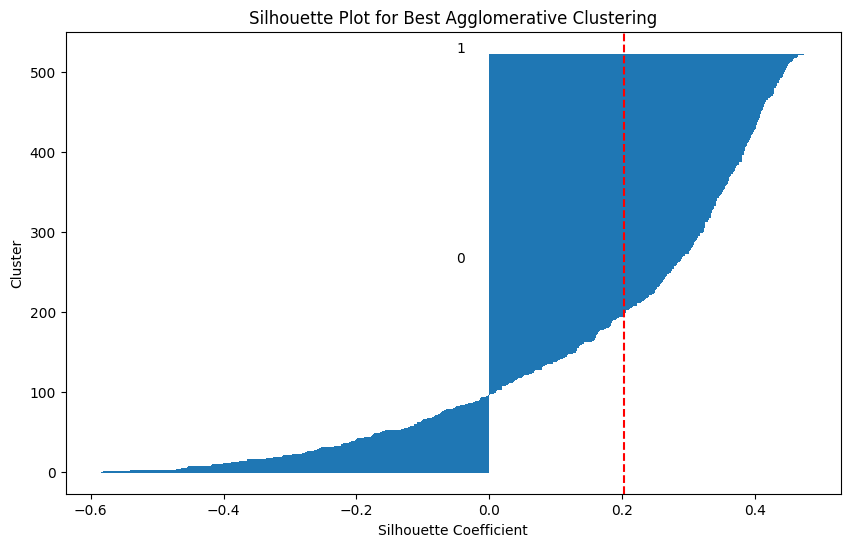

In [71]:
# Silhouette plot for the best model
from sklearn.metrics import silhouette_samples

plt.figure(figsize=(10, 6))
silhouette_vals = silhouette_samples(women_df_pca, best_model.labels_)
y_ticks = []
y_lower, y_upper = 0, 0

for i, cluster in enumerate(np.unique(best_model.labels_)):
    cluster_silhouette_vals = silhouette_vals[best_model.labels_ == cluster]
    cluster_silhouette_vals.sort()
    y_upper += len(cluster_silhouette_vals)
    plt.barh(range(y_lower, y_upper), cluster_silhouette_vals, height=1)
    plt.text(-0.05, (y_lower + y_upper) / 2, str(cluster))
    y_lower += len(cluster_silhouette_vals)

plt.axvline(best_silhouette, color="red", linestyle="--")  # Corrected line
plt.ylabel('Cluster')
plt.xlabel('Silhouette Coefficient')
plt.title('Silhouette Plot for Best Agglomerative Clustering')
plt.show()

Best Parameters after extended fine-tuning: {'linkage': 'single', 'n_clusters': 2}
Best Silhouette Score: 0.20319672412675183
Best Davies-Bouldin Score: 0.6242720926981117
Best Calinski-Harabasz Score: 2.431030276493024


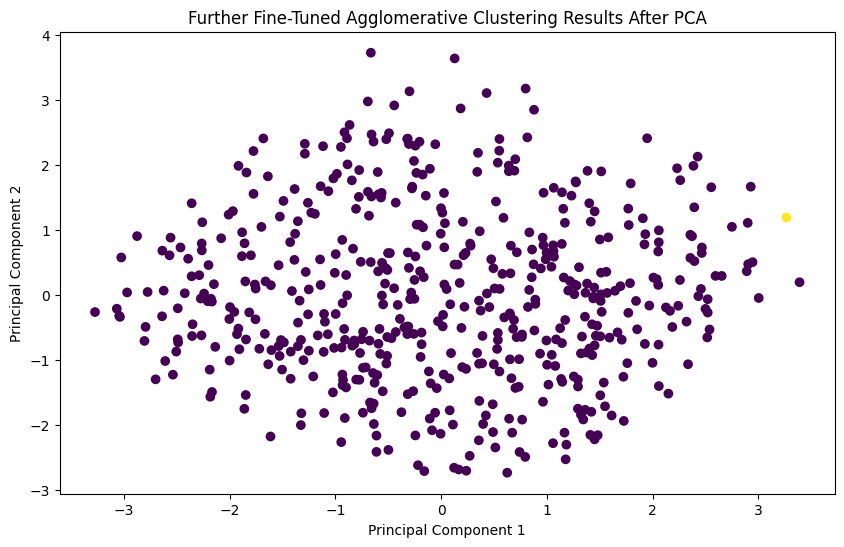

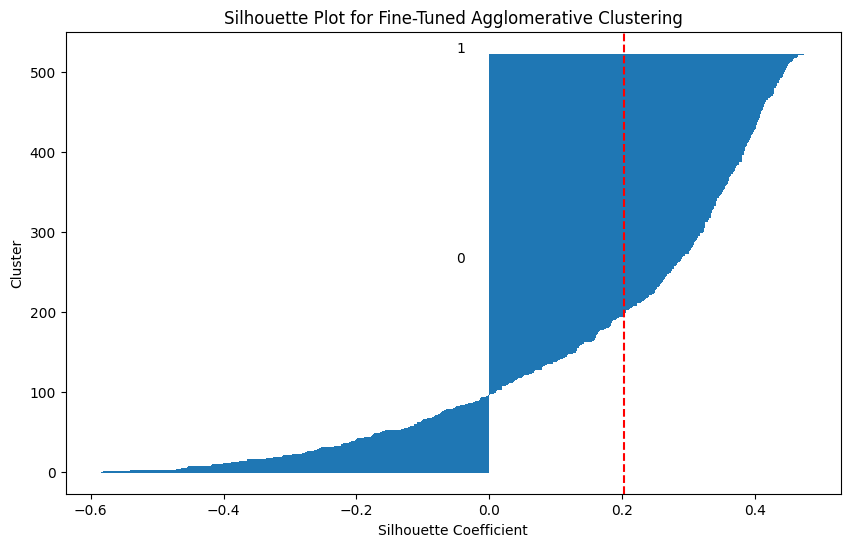

In [72]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score
from sklearn.model_selection import ParameterGrid

# Expanded Parameter Grid Search with more clusters and all linkage methods
param_grid = {
    'n_clusters': range(2, 7),  # Exploring 2 to 6 clusters
    'linkage': ['ward', 'complete', 'average', 'single'],  # All linkage methods
}

best_silhouette = -1
best_params = {}
best_model = None
best_db_score = float('inf')
best_ch_score = 0

for params in ParameterGrid(param_grid):
    model = AgglomerativeClustering(n_clusters=params['n_clusters'], linkage=params['linkage'])
    labels = model.fit_predict(women_df_pca)
    
    silhouette_avg = silhouette_score(women_df_pca, labels)
    db_score = davies_bouldin_score(women_df_pca, labels)
    ch_score = calinski_harabasz_score(women_df_pca, labels)
    
    # Combining metrics to find the best clustering
    if silhouette_avg > best_silhouette and db_score < best_db_score:
        best_silhouette = silhouette_avg
        best_db_score = db_score
        best_ch_score = ch_score
        best_params = params
        best_model = model

print(f"Best Parameters after extended fine-tuning: {best_params}")
print(f"Best Silhouette Score: {best_silhouette}")
print(f"Best Davies-Bouldin Score: {best_db_score}")
print(f"Best Calinski-Harabasz Score: {best_ch_score}")

# Visualize the final clustering
plt.figure(figsize=(10, 6))
plt.scatter(women_df_pca[:, 0], women_df_pca[:, 1], c=best_model.labels_, cmap='viridis')
plt.title('Further Fine-Tuned Agglomerative Clustering Results After PCA')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

# Generate and visualize the updated Silhouette Plot
plt.figure(figsize=(10, 6))
silhouette_vals = silhouette_samples(women_df_pca, best_model.labels_)
y_ticks = []
y_lower, y_upper = 0, 0

for i, cluster in enumerate(np.unique(best_model.labels_)):
    cluster_silhouette_vals = silhouette_vals[best_model.labels_ == cluster]
    cluster_silhouette_vals.sort()
    y_upper += len(cluster_silhouette_vals)
    plt.barh(range(y_lower, y_upper), cluster_silhouette_vals, height=1)
    plt.text(-0.05, (y_lower + y_upper) / 2, str(cluster))
    y_lower += len(cluster_silhouette_vals)

plt.axvline(best_silhouette, color="red", linestyle="--")
plt.ylabel('Cluster')
plt.xlabel('Silhouette Coefficient')
plt.title('Silhouette Plot for Fine-Tuned Agglomerative Clustering')
plt.show()


Best Parameters after systematic fine-tuning: {'linkage': 'ward', 'n_clusters': 2}
Best Silhouette Score: 0.1785397541813149
Best Davies-Bouldin Score: 2.0033048246818703
Best Calinski-Harabasz Score: 115.317537868321


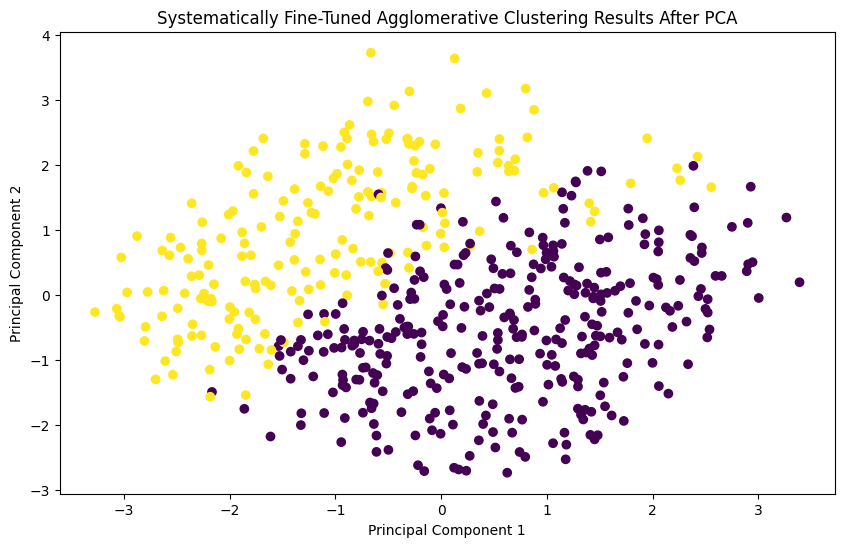

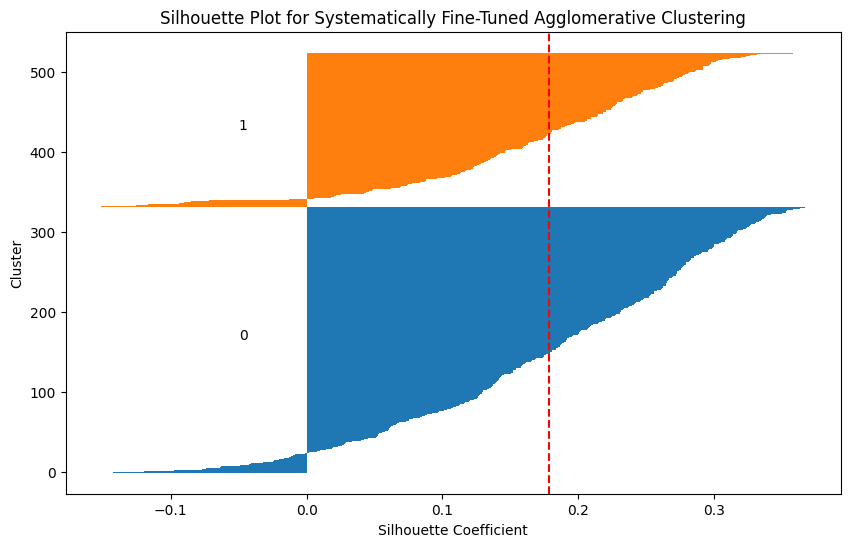

In [73]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score
from sklearn.model_selection import ParameterGrid
import matplotlib.pyplot as plt

# Expanded Parameter Grid Search with all linkage methods and a wider range of clusters
param_grid = {
    'n_clusters': range(2, 7),  # Exploring clusters from 2 to 6
    'linkage': ['ward', 'complete', 'average']  # All available linkage methods except 'single'
}

best_silhouette = -1
best_params = {}
best_model = None
best_db_score = float('inf')
best_ch_score = 0

for params in ParameterGrid(param_grid):
    model = AgglomerativeClustering(n_clusters=params['n_clusters'], linkage=params['linkage'])
    labels = model.fit_predict(women_df_pca)
    
    silhouette_avg = silhouette_score(women_df_pca, labels)
    db_score = davies_bouldin_score(women_df_pca, labels)
    ch_score = calinski_harabasz_score(women_df_pca, labels)
    
    # Combining metrics to find the best clustering
    if silhouette_avg > best_silhouette and db_score < best_db_score:
        best_silhouette = silhouette_avg
        best_db_score = db_score
        best_ch_score = ch_score
        best_params = params
        best_model = model

print(f"Best Parameters after systematic fine-tuning: {best_params}")
print(f"Best Silhouette Score: {best_silhouette}")
print(f"Best Davies-Bouldin Score: {best_db_score}")
print(f"Best Calinski-Harabasz Score: {best_ch_score}")

# Visualize the final clustering
plt.figure(figsize=(10, 6))
plt.scatter(women_df_pca[:, 0], women_df_pca[:, 1], c=best_model.labels_, cmap='viridis')
plt.title('Systematically Fine-Tuned Agglomerative Clustering Results After PCA')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

# Generate and visualize the updated Silhouette Plot
plt.figure(figsize=(10, 6))
silhouette_vals = silhouette_samples(women_df_pca, best_model.labels_)
y_ticks = []
y_lower, y_upper = 0, 0

for i, cluster in enumerate(np.unique(best_model.labels_)):
    cluster_silhouette_vals = silhouette_vals[best_model.labels_ == cluster]
    cluster_silhouette_vals.sort()
    y_upper += len(cluster_silhouette_vals)
    plt.barh(range(y_lower, y_upper), cluster_silhouette_vals, height=1)
    plt.text(-0.05, (y_lower + y_upper) / 2, str(cluster))
    y_lower += len(cluster_silhouette_vals)

plt.axvline(best_silhouette, color="red", linestyle="--")
plt.ylabel('Cluster')
plt.xlabel('Silhouette Coefficient')
plt.title('Silhouette Plot for Systematically Fine-Tuned Agglomerative Clustering')
plt.show()


Best Parameters for 'complete' and 'average' linkage: {'linkage': 'average', 'n_clusters': 2}
Best Silhouette Score: 0.1680248748789872
Best Davies-Bouldin Score: 2.0194782972061156
Best Calinski-Harabasz Score: 111.01191614244718


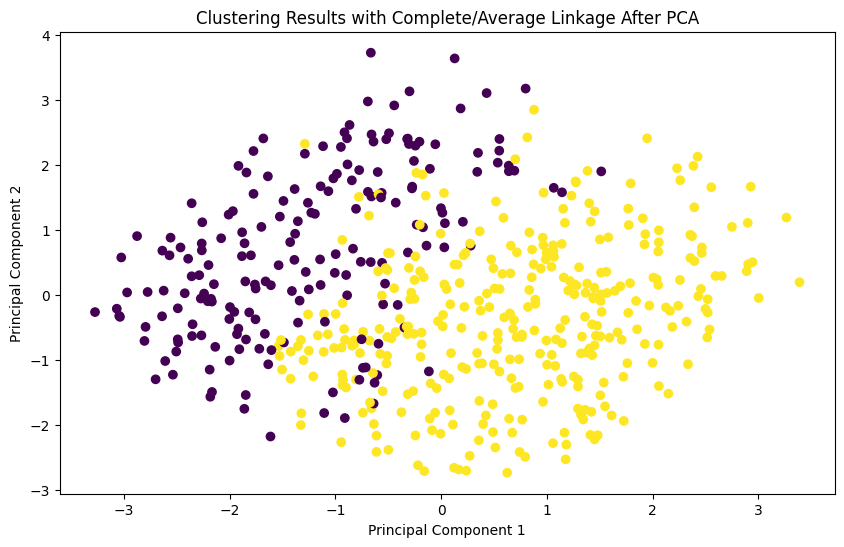

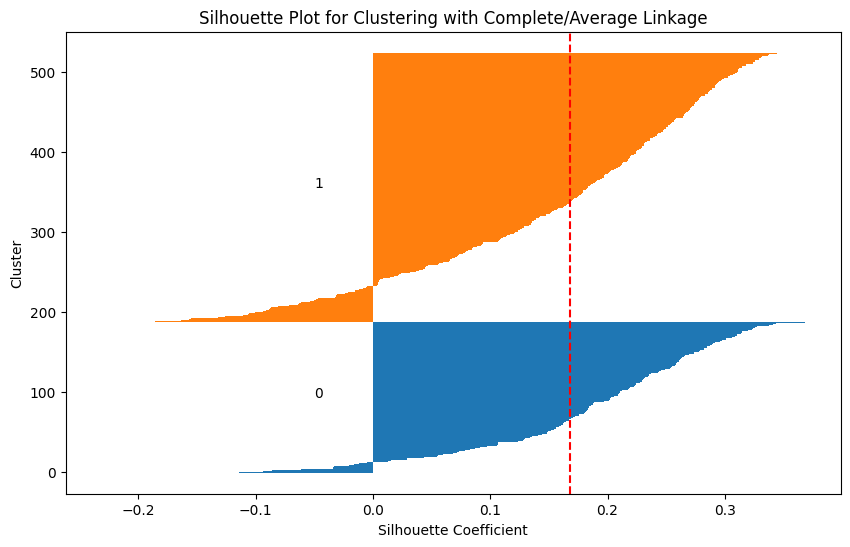

In [74]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score
from sklearn.model_selection import ParameterGrid
import matplotlib.pyplot as plt

# Focused Parameter Grid for 'complete' and 'average' linkages
param_grid = {
    'n_clusters': range(2, 7),  # Exploring clusters from 2 to 6
    'linkage': ['complete', 'average']  # Focused on 'complete' and 'average' linkage methods
}

best_silhouette = -1
best_params = {}
best_model = None
best_db_score = float('inf')
best_ch_score = 0

for params in ParameterGrid(param_grid):
    model = AgglomerativeClustering(n_clusters=params['n_clusters'], linkage=params['linkage'])
    labels = model.fit_predict(women_df_pca)
    
    silhouette_avg = silhouette_score(women_df_pca, labels)
    db_score = davies_bouldin_score(women_df_pca, labels)
    ch_score = calinski_harabasz_score(women_df_pca, labels)
    
    # Combining metrics to find the best clustering
    if silhouette_avg > best_silhouette and db_score < best_db_score:
        best_silhouette = silhouette_avg
        best_db_score = db_score
        best_ch_score = ch_score
        best_params = params
        best_model = model

print(f"Best Parameters for 'complete' and 'average' linkage: {best_params}")
print(f"Best Silhouette Score: {best_silhouette}")
print(f"Best Davies-Bouldin Score: {best_db_score}")
print(f"Best Calinski-Harabasz Score: {best_ch_score}")

# Visualize the final clustering
plt.figure(figsize=(10, 6))
plt.scatter(women_df_pca[:, 0], women_df_pca[:, 1], c=best_model.labels_, cmap='viridis')
plt.title('Clustering Results with Complete/Average Linkage After PCA')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

# Generate and visualize the updated Silhouette Plot
plt.figure(figsize=(10, 6))
silhouette_vals = silhouette_samples(women_df_pca, best_model.labels_)
y_ticks = []
y_lower, y_upper = 0, 0

for i, cluster in enumerate(np.unique(best_model.labels_)):
    cluster_silhouette_vals = silhouette_vals[best_model.labels_ == cluster]
    cluster_silhouette_vals.sort()
    y_upper += len(cluster_silhouette_vals)
    plt.barh(range(y_lower, y_upper), cluster_silhouette_vals, height=1)
    plt.text(-0.05, (y_lower + y_upper) / 2, str(cluster))
    y_lower += len(cluster_silhouette_vals)

plt.axvline(best_silhouette, color="red", linestyle="--")
plt.ylabel('Cluster')
plt.xlabel('Silhouette Coefficient')
plt.title('Silhouette Plot for Clustering with Complete/Average Linkage')
plt.show()


Best Parameters with increased number of clusters: {'linkage': 'average', 'n_clusters': 3}
Best Silhouette Score: 0.13421048402964741
Best Davies-Bouldin Score: 1.6300237243326103
Best Calinski-Harabasz Score: 91.43359681243045


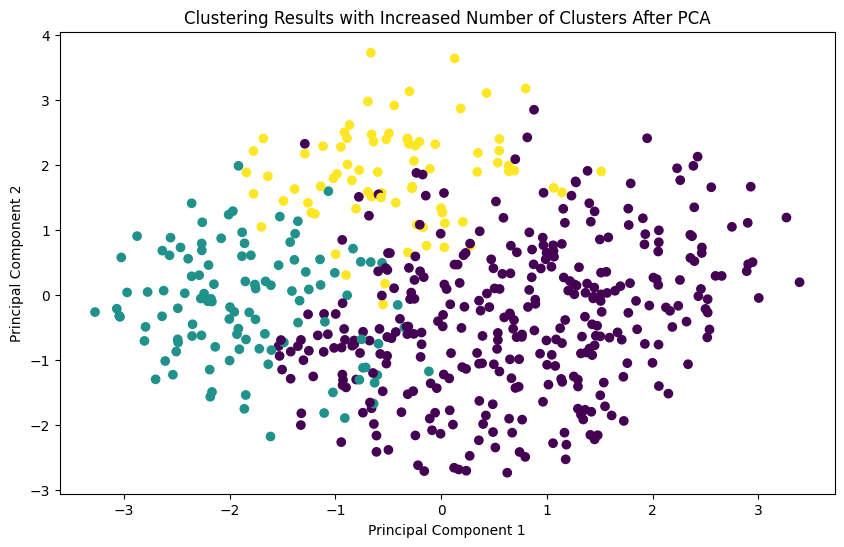

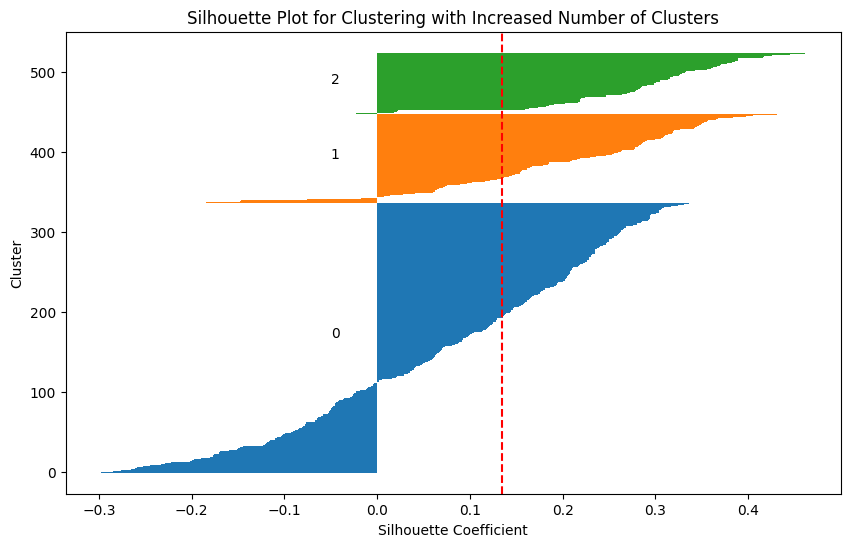

In [75]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score
from sklearn.model_selection import ParameterGrid
import matplotlib.pyplot as plt

# Expanded Parameter Grid to include more clusters
param_grid = {
    'n_clusters': range(3, 10),  # Exploring clusters from 3 to 9
    'linkage': ['complete', 'average']  # Focused on 'complete' and 'average' linkages
}

best_silhouette = -1
best_params = {}
best_model = None
best_db_score = float('inf')
best_ch_score = 0

for params in ParameterGrid(param_grid):
    model = AgglomerativeClustering(n_clusters=params['n_clusters'], linkage=params['linkage'])
    labels = model.fit_predict(women_df_pca)
    
    silhouette_avg = silhouette_score(women_df_pca, labels)
    db_score = davies_bouldin_score(women_df_pca, labels)
    ch_score = calinski_harabasz_score(women_df_pca, labels)
    
    # Combining metrics to find the best clustering
    if silhouette_avg > best_silhouette and db_score < best_db_score:
        best_silhouette = silhouette_avg
        best_db_score = db_score
        best_ch_score = ch_score
        best_params = params
        best_model = model

print(f"Best Parameters with increased number of clusters: {best_params}")
print(f"Best Silhouette Score: {best_silhouette}")
print(f"Best Davies-Bouldin Score: {best_db_score}")
print(f"Best Calinski-Harabasz Score: {best_ch_score}")

# Visualize the final clustering
plt.figure(figsize=(10, 6))
plt.scatter(women_df_pca[:, 0], women_df_pca[:, 1], c=best_model.labels_, cmap='viridis')
plt.title('Clustering Results with Increased Number of Clusters After PCA')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

# Generate and visualize the updated Silhouette Plot
plt.figure(figsize=(10, 6))
silhouette_vals = silhouette_samples(women_df_pca, best_model.labels_)
y_ticks = []
y_lower, y_upper = 0, 0

for i, cluster in enumerate(np.unique(best_model.labels_)):
    cluster_silhouette_vals = silhouette_vals[best_model.labels_ == cluster]
    cluster_silhouette_vals.sort()
    y_upper += len(cluster_silhouette_vals)
    plt.barh(range(y_lower, y_upper), cluster_silhouette_vals, height=1)
    plt.text(-0.05, (y_lower + y_upper) / 2, str(cluster))
    y_lower += len(cluster_silhouette_vals)

plt.axvline(best_silhouette, color="red", linestyle="--")
plt.ylabel('Cluster')
plt.xlabel('Silhouette Coefficient')
plt.title('Silhouette Plot for Clustering with Increased Number of Clusters')
plt.show()


# G-Clustering

Initial GMM Silhouette Score: 0.17765440645242142
Initial GMM Davies-Bouldin Score: 1.6290616231465478
Initial GMM Calinski-Harabasz Score: 124.78960432954563


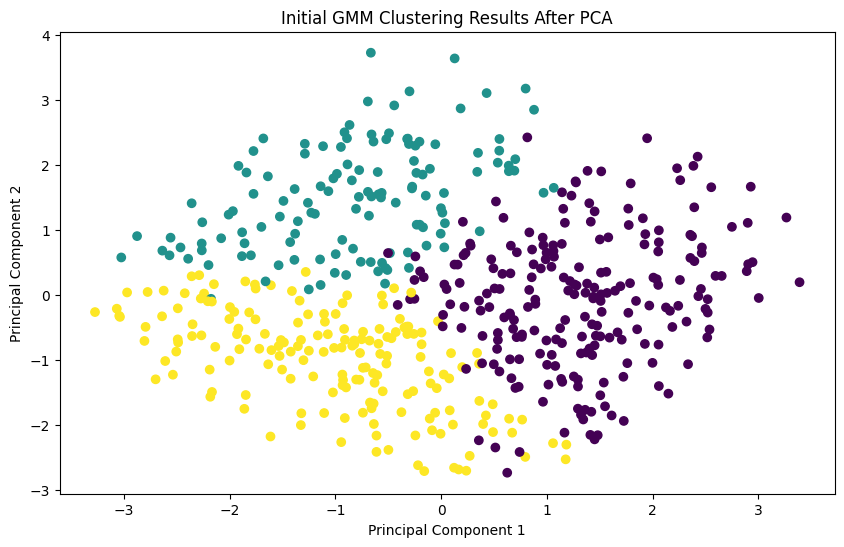

In [26]:
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score

# Step 1: Fit an initial GMM model
initial_gmm = GaussianMixture(n_components=3, random_state=42)  # Start with 3 components
initial_gmm_labels = initial_gmm.fit_predict(women_df_pca)

# Evaluate the initial GMM
initial_silhouette = silhouette_score(women_df_pca, initial_gmm_labels)
initial_db_score = davies_bouldin_score(women_df_pca, initial_gmm_labels)
initial_ch_score = calinski_harabasz_score(women_df_pca, initial_gmm_labels)

print(f"Initial GMM Silhouette Score: {initial_silhouette}")
print(f"Initial GMM Davies-Bouldin Score: {initial_db_score}")
print(f"Initial GMM Calinski-Harabasz Score: {initial_ch_score}")

# Visualize the clustering results
plt.figure(figsize=(10, 6))
plt.scatter(women_df_pca[:, 0], women_df_pca[:, 1], c=initial_gmm_labels, cmap='viridis')
plt.title('Initial GMM Clustering Results After PCA')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

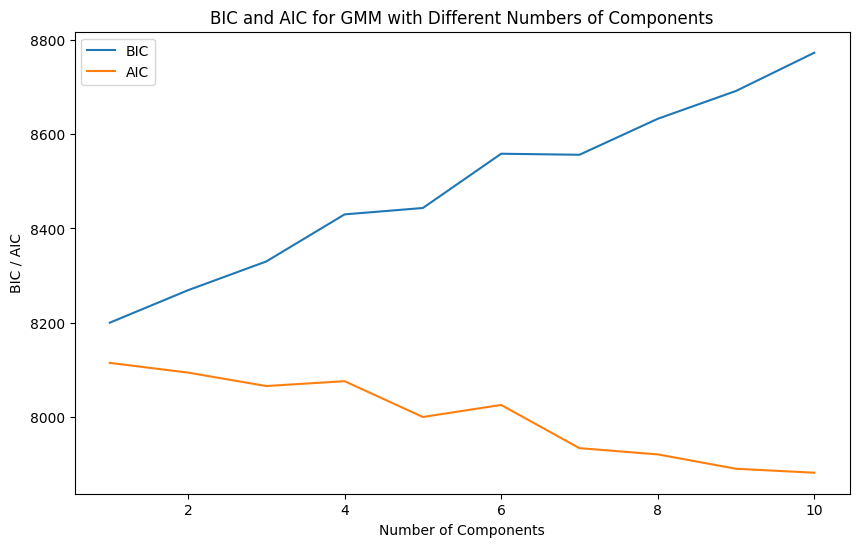

Optimal number of components based on BIC: 1


In [78]:
# Step 2: Determine Optimal Number of Components using BIC and AIC
n_components = np.arange(1, 11)
gmm_models = [GaussianMixture(n, random_state=42).fit(women_df_pca) for n in n_components]
bics = [model.bic(women_df_pca) for model in gmm_models]
aics = [model.aic(women_df_pca) for model in gmm_models]

# Plotting BIC and AIC
plt.figure(figsize=(10, 6))
plt.plot(n_components, bics, label='BIC')
plt.plot(n_components, aics, label='AIC')
plt.xlabel('Number of Components')
plt.ylabel('BIC / AIC')
plt.title('BIC and AIC for GMM with Different Numbers of Components')
plt.legend()
plt.show()

# Choose the optimal number of components based on the lowest BIC or AIC
optimal_n_components = n_components[np.argmin(bics)]
print(f"Optimal number of components based on BIC: {optimal_n_components}")


Fixed GMM Silhouette Score: 0.17765440645242142
Fixed GMM Davies-Bouldin Score: 1.6290616231465478
Fixed GMM Calinski-Harabasz Score: 124.78960432954563


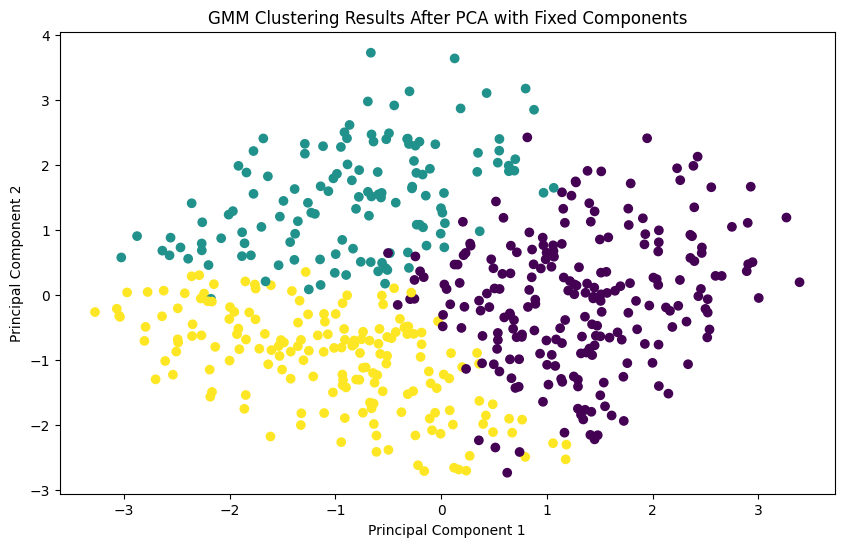

C:\Users\Lenovo\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_search.py:1051: UserWarning: One or more of the test scores are non-finite: [nan nan nan nan nan nan nan nan nan nan nan nan]
  warnings.warn(


Best Parameters for Refined GMM: {'covariance_type': 'full', 'init_params': 'kmeans', 'n_components': 2, 'n_init': 5}
Refined GMM Silhouette Score: 0.19276392017494504
Refined GMM Davies-Bouldin Score: 1.877917093756061
Refined GMM Calinski-Harabasz Score: 140.07053898621513


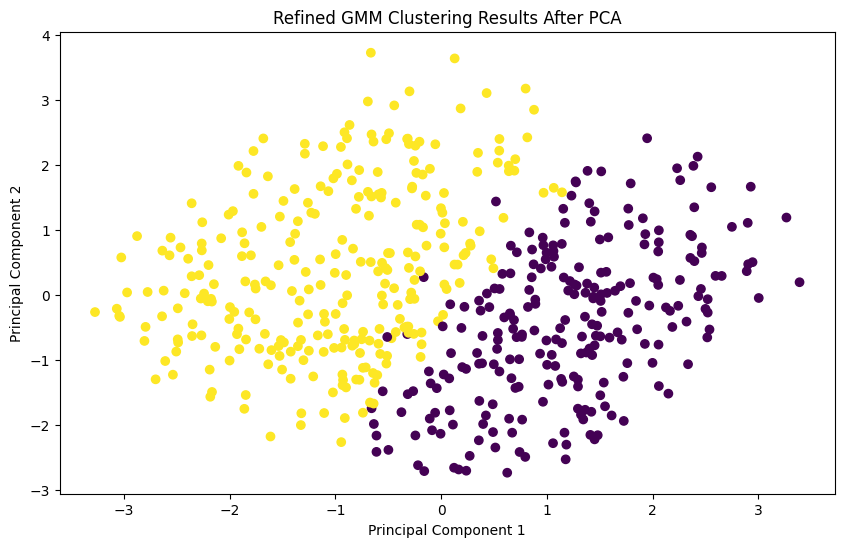

In [80]:
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score
from sklearn.model_selection import GridSearchCV

# Step 1: Fit a GMM with a fixed number of components
fixed_n_components = 3
gmm_fixed = GaussianMixture(n_components=fixed_n_components, random_state=42)
gmm_fixed_labels = gmm_fixed.fit_predict(women_df_pca)

# Evaluate the GMM with fixed components
fixed_silhouette = silhouette_score(women_df_pca, gmm_fixed_labels)
fixed_db_score = davies_bouldin_score(women_df_pca, gmm_fixed_labels)
fixed_ch_score = calinski_harabasz_score(women_df_pca, gmm_fixed_labels)

print(f"Fixed GMM Silhouette Score: {fixed_silhouette}")
print(f"Fixed GMM Davies-Bouldin Score: {fixed_db_score}")
print(f"Fixed GMM Calinski-Harabasz Score: {fixed_ch_score}")

# Visualize the clustering results
plt.figure(figsize=(10, 6))
plt.scatter(women_df_pca[:, 0], women_df_pca[:, 1], c=gmm_fixed_labels, cmap='viridis')
plt.title('GMM Clustering Results After PCA with Fixed Components')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

# Step 2: Refined Grid Search with Controlled Parameters
param_grid_refined = {
    'n_components': [2, 3, 4],  # Refined to avoid single-component solutions
    'covariance_type': ['full', 'diag'],  # More common covariance types
    'init_params': ['kmeans'],  # Use KMeans for initialization to avoid poor starts
    'n_init': [5, 10]  # Ensure multiple initializations
}

gmm_refined = GaussianMixture(random_state=42)
grid_search_refined = GridSearchCV(gmm_refined, param_grid_refined, scoring='neg_log_loss', cv=5, n_jobs=-1)
grid_search_refined.fit(women_df_pca)

# Best GMM model from refined Grid Search
best_gmm_refined = grid_search_refined.best_estimator_
best_gmm_refined_labels = best_gmm_refined.predict(women_df_pca)

# Evaluate the refined GMM Model
refined_silhouette = silhouette_score(women_df_pca, best_gmm_refined_labels)
refined_db_score = davies_bouldin_score(women_df_pca, best_gmm_refined_labels)
refined_ch_score = calinski_harabasz_score(women_df_pca, best_gmm_refined_labels)

print(f"Best Parameters for Refined GMM: {grid_search_refined.best_params_}")
print(f"Refined GMM Silhouette Score: {refined_silhouette}")
print(f"Refined GMM Davies-Bouldin Score: {refined_db_score}")
print(f"Refined GMM Calinski-Harabasz Score: {refined_ch_score}")

# Visualize the clustering results
plt.figure(figsize=(10, 6))
plt.scatter(women_df_pca[:, 0], women_df_pca[:, 1], c=best_gmm_refined_labels, cmap='viridis')
plt.title('Refined GMM Clustering Results After PCA')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()


C:\Users\Lenovo\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_search.py:1051: UserWarning: One or more of the test scores are non-finite: [nan nan nan nan nan nan nan nan nan nan]
  warnings.warn(


Best Parameters for GMM: {'tol': 0.0001, 'n_init': 5, 'n_components': 5, 'covariance_type': 'diag'}
Tuned GMM Silhouette Score: 0.08729650654410287
Tuned GMM Davies-Bouldin Score: 1.5969835837785482
Tuned GMM Calinski-Harabasz Score: 66.70622575378107


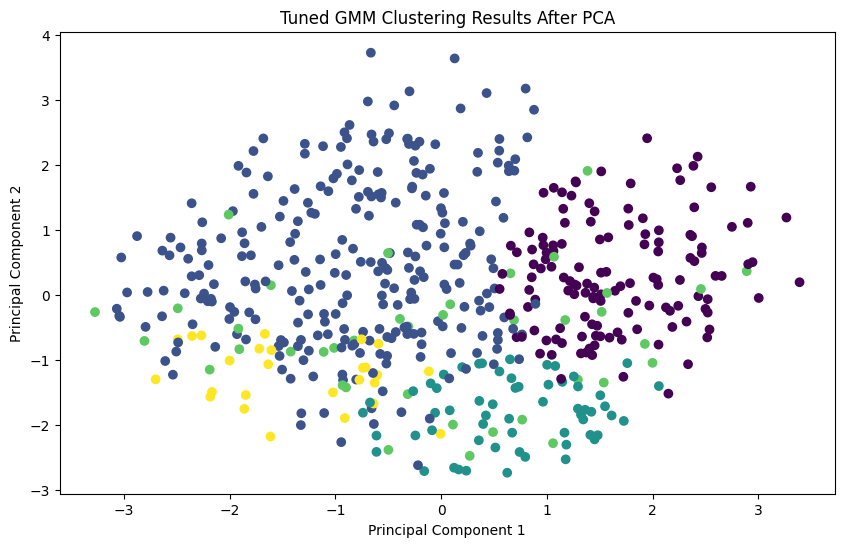

In [82]:
from sklearn.mixture import GaussianMixture
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score

# Step 1: Simplified parameter grid
param_dist = {
    'n_components': range(2, 6),  # Narrowing down to a smaller range of components
    'covariance_type': ['full', 'diag'],  # Focus on two effective covariance types
    'n_init': [5, 10],  # Fewer initialization runs
    'tol': [1e-3, 1e-4],  # Standard tolerance values
}

# Step 2: Initialize GMM
gmm = GaussianMixture(random_state=42)

# Step 3: Randomized Search with Cross-Validation
random_search = RandomizedSearchCV(gmm, param_dist, n_iter=10, scoring='neg_log_loss', cv=3, n_jobs=-1, random_state=42)
random_search.fit(women_df_pca)

# Step 4: Best GMM model from Randomized Search
best_gmm = random_search.best_estimator_
best_gmm_labels = best_gmm.predict(women_df_pca)

# Step 5: Evaluate the Tuned GMM Model
tuned_silhouette = silhouette_score(women_df_pca, best_gmm_labels)
tuned_db_score = davies_bouldin_score(women_df_pca, best_gmm_labels)
tuned_ch_score = calinski_harabasz_score(women_df_pca, best_gmm_labels)

# Output the best parameters and evaluation metrics
print(f"Best Parameters for GMM: {random_search.best_params_}")
print(f"Tuned GMM Silhouette Score: {tuned_silhouette}")
print(f"Tuned GMM Davies-Bouldin Score: {tuned_db_score}")
print(f"Tuned GMM Calinski-Harabasz Score: {tuned_ch_score}")

# Visualize the clustering results
plt.figure(figsize=(10, 6))
plt.scatter(women_df_pca[:, 0], women_df_pca[:, 1], c=best_gmm_labels, cmap='viridis')
plt.title('Tuned GMM Clustering Results After PCA')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()


C:\Users\Lenovo\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\mixture\_base.py:268: ConvergenceWarning: Initialization 1 did not converge. Try different init parameters, or increase max_iter, tol or check for degenerate data.
  warnings.warn(
C:\Users\Lenovo\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\mixture\_base.py:268: ConvergenceWarning: Initialization 5 did not converge. Try different init parameters, or increase max_iter, tol or check for degenerate data.
  warnings.warn(
C:\Users\Lenovo\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\mixture\_base.py:268: ConvergenceWarning: Initialization 7 did not converge. Try different init parameters, or increase max_iter, tol or check for degenerate data.
  warnings.warn(
C:\Users\Lenovo\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\mixture\_base.py:268: ConvergenceWarning: Initialization 10 did not converge. Try different init parameters, or increase max_iter

Best Parameters for GMM after advanced tuning: {'n_components': 10, 'covariance_type': 'spherical', 'tol': 0.00020645954174332802, 'n_init': 10, 'reg_covar': 1e-06}
Optimized GMM Silhouette Score: 0.08304980825193771
Optimized GMM Davies-Bouldin Score: 1.3332459200598235
Optimized GMM Calinski-Harabasz Score: 65.93788569087096


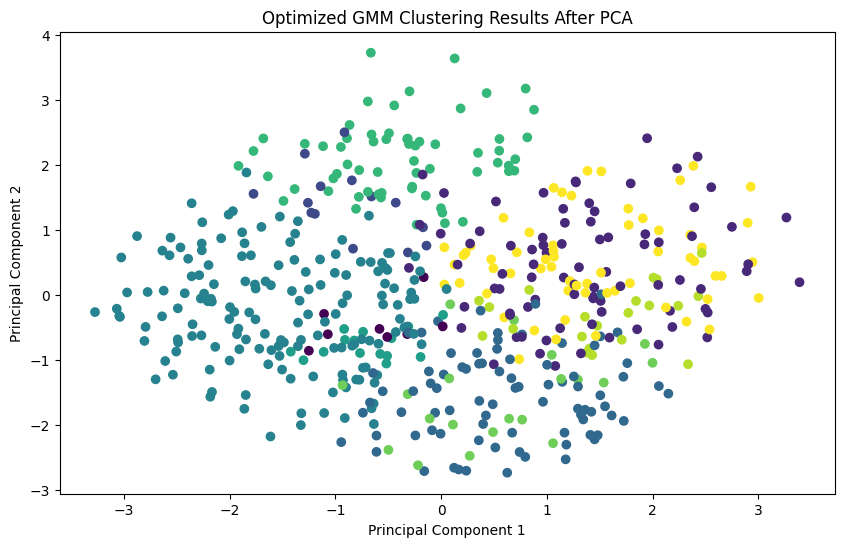

In [85]:
from skopt import gp_minimize
from skopt.space import Real, Integer, Categorical
from skopt.utils import use_named_args
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score

# Define the search space for GMM
search_space = [
    Integer(2, 10, name='n_components'),
    Categorical(['full', 'tied', 'diag', 'spherical'], name='covariance_type'),
    Real(1e-6, 1e-3, prior='log-uniform', name='tol'),
    Integer(1, 10, name='n_init'),
    Real(1e-6, 1e-4, prior='log-uniform', name='reg_covar')
]

# Define the objective function to minimize
@use_named_args(search_space)
def objective(**params):
    gmm = GaussianMixture(random_state=42, **params)
    labels = gmm.fit_predict(women_df_pca)
    
    silhouette = silhouette_score(women_df_pca, labels)
    davies_bouldin = davies_bouldin_score(women_df_pca, labels)
    calinski_harabasz = calinski_harabasz_score(women_df_pca, labels)
    
    # We aim to maximize silhouette and Calinski-Harabasz, and minimize Davies-Bouldin
    # Therefore, we can combine these into a single score by maximizing silhouette and CH, while minimizing DB
    score = -silhouette + davies_bouldin - calinski_harabasz / 1000  # Adjust weights if necessary
    
    return score

# Perform Bayesian optimization
result = gp_minimize(objective, search_space, n_calls=50, random_state=42)

# Retrieve the best parameters and evaluate
best_params = {dim.name: val for dim, val in zip(search_space, result.x)}
best_gmm = GaussianMixture(random_state=42, **best_params)
best_labels = best_gmm.fit_predict(women_df_pca)

# Final evaluation with the best parameters
best_silhouette_score = silhouette_score(women_df_pca, best_labels)
best_db_score = davies_bouldin_score(women_df_pca, best_labels)
best_ch_score = calinski_harabasz_score(women_df_pca, best_labels)

print(f"Best Parameters for GMM after advanced tuning: {best_params}")
print(f"Optimized GMM Silhouette Score: {best_silhouette_score}")
print(f"Optimized GMM Davies-Bouldin Score: {best_db_score}")
print(f"Optimized GMM Calinski-Harabasz Score: {best_ch_score}")

# Visualize the best clustering results
plt.figure(figsize=(10, 6))
plt.scatter(women_df_pca[:, 0], women_df_pca[:, 1], c=best_labels, cmap='viridis')
plt.title('Optimized GMM Clustering Results After PCA')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()


Fitting 3 folds for each of 50 candidates, totalling 150 fits


C:\Users\Lenovo\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_search.py:1051: UserWarning: One or more of the test scores are non-finite: [nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan]
  warnings.warn(


Best Parameters for GMM after RandomizedSearchCV tuning: {'tol': 0.002154434690031882, 'reg_covar': 2.782559402207126e-06, 'n_init': 10, 'n_components': 3, 'covariance_type': 'tied'}
Optimized GMM Silhouette Score: 0.15581823213159515
Optimized GMM Davies-Bouldin Score: 1.8000026766673154
Optimized GMM Calinski-Harabasz Score: 111.87479480810501


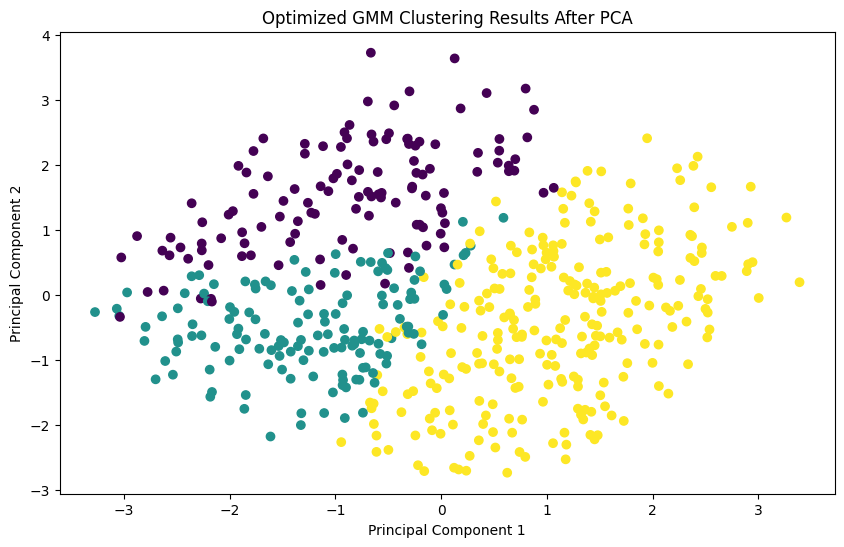

In [90]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.mixture import GaussianMixture
from sklearn.metrics import make_scorer, silhouette_score
import numpy as np

# Define the silhouette score as the scoring metric
silhouette_scorer = make_scorer(silhouette_score, greater_is_better=True)

# Define the parameter grid
param_grid = {
    'n_components': [3, 4],
    'covariance_type': ['full', 'tied', 'diag', 'spherical'],
    'tol': np.logspace(-4, -2, 10),
    'reg_covar': np.logspace(-6, -4, 10),
    'n_init': [5, 10]
}

# Initialize the GMM model
gmm = GaussianMixture(random_state=42)

# Set up RandomizedSearchCV
random_search = RandomizedSearchCV(
    estimator=gmm,
    param_distributions=param_grid,
    n_iter=50,
    scoring=silhouette_scorer,
    cv=3,
    n_jobs=-1,
    verbose=3,
    random_state=42
)

# Fit the RandomizedSearchCV model
random_search.fit(women_df_pca)

# Get the best model and parameters
best_gmm = random_search.best_estimator_
best_gmm_labels = best_gmm.predict(women_df_pca)

# Evaluate the optimized GMM
tuned_silhouette = silhouette_score(women_df_pca, best_gmm_labels)
tuned_db_score = davies_bouldin_score(women_df_pca, best_gmm_labels)
tuned_ch_score = calinski_harabasz_score(women_df_pca, best_gmm_labels)

# Print the best parameters and the optimized scores
print(f"Best Parameters for GMM after RandomizedSearchCV tuning: {random_search.best_params_}")
print(f"Optimized GMM Silhouette Score: {tuned_silhouette}")
print(f"Optimized GMM Davies-Bouldin Score: {tuned_db_score}")
print(f"Optimized GMM Calinski-Harabasz Score: {tuned_ch_score}")

# Visualize the clustering results
plt.figure(figsize=(10, 6))
plt.scatter(women_df_pca[:, 0], women_df_pca[:, 1], c=best_gmm_labels, cmap='viridis')
plt.title('Optimized GMM Clustering Results After PCA')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()


## Specteral Clustering

Initial Spectral Clustering Silhouette Score: 0.17708825355127886
Initial Spectral Clustering Davies-Bouldin Score: 1.6048205593873632
Initial Spectral Clustering Calinski-Harabasz Score: 123.1731092890405


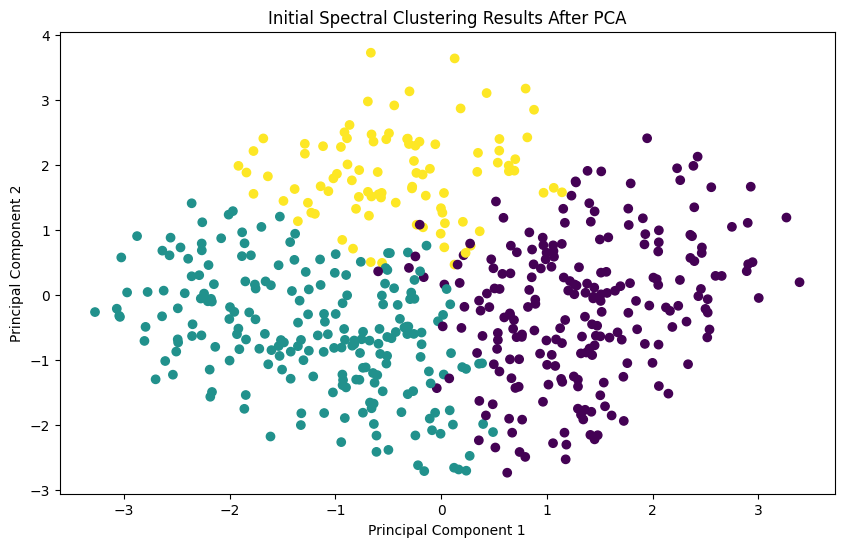

In [28]:
from sklearn.cluster import SpectralClustering
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score
import matplotlib.pyplot as plt

# Step 1: Initial Spectral Clustering
spectral = SpectralClustering(n_clusters=3, affinity='nearest_neighbors', random_state=42)
spectral_labels = spectral.fit_predict(women_df_pca)

# Evaluate Initial Spectral Clustering
spectral_silhouette = silhouette_score(women_df_pca, spectral_labels)
spectral_db_score = davies_bouldin_score(women_df_pca, spectral_labels)
spectral_ch_score = calinski_harabasz_score(women_df_pca, spectral_labels)

print(f"Initial Spectral Clustering Silhouette Score: {spectral_silhouette}")
print(f"Initial Spectral Clustering Davies-Bouldin Score: {spectral_db_score}")
print(f"Initial Spectral Clustering Calinski-Harabasz Score: {spectral_ch_score}")

# Visualize the initial clustering
plt.figure(figsize=(10, 6))
plt.scatter(women_df_pca[:, 0], women_df_pca[:, 1], c=spectral_labels, cmap='viridis')
plt.title('Initial Spectral Clustering Results After PCA')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()


C:\Users\Lenovo\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_search.py:1051: UserWarning: One or more of the test scores are non-finite: [nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan]
  warnings.warn(


Best Parameters for Spectral Clustering: {'affinity': 'nearest_neighbors', 'n_clusters': 2, 'n_neighbors': 5}
Best Spectral Clustering Silhouette Score: 0.1795226299786991
Best Spectral Clustering Davies-Bouldin Score: 1.9609052608551047
Best Spectral Clustering Calinski-Harabasz Score: 127.15858170445037


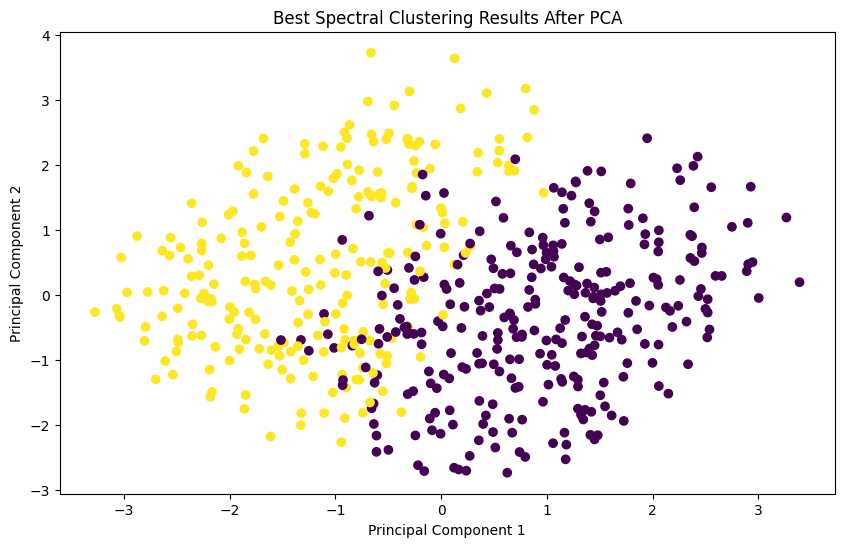

In [30]:
from sklearn.metrics import make_scorer, silhouette_score
from sklearn.cluster import SpectralClustering
from sklearn.model_selection import GridSearchCV

# Custom scorer using silhouette score
silhouette_scorer = make_scorer(silhouette_score)

# Step 2: Hyperparameter Tuning for Spectral Clustering
param_grid = {
    'n_clusters': range(2, 11),  # Number of clusters to explore
    'affinity': ['nearest_neighbors', 'rbf'],  # Different affinity options
    'n_neighbors': [5, 10, 20]  # Relevant when using 'nearest_neighbors'
}

spectral = SpectralClustering(random_state=42)
grid_search = GridSearchCV(spectral, param_grid, scoring=silhouette_scorer, cv=5, n_jobs=-1)
grid_search.fit(women_df_pca)

# Best Spectral Clustering model
best_spectral = grid_search.best_estimator_
best_spectral_labels = best_spectral.fit_predict(women_df_pca)

# Evaluate the best Spectral Clustering model
best_spectral_silhouette = silhouette_score(women_df_pca, best_spectral_labels)
best_spectral_db_score = davies_bouldin_score(women_df_pca, best_spectral_labels)
best_spectral_ch_score = calinski_harabasz_score(women_df_pca, best_spectral_labels)

print(f"Best Parameters for Spectral Clustering: {grid_search.best_params_}")
print(f"Best Spectral Clustering Silhouette Score: {best_spectral_silhouette}")
print(f"Best Spectral Clustering Davies-Bouldin Score: {best_spectral_db_score}")
print(f"Best Spectral Clustering Calinski-Harabasz Score: {best_spectral_ch_score}")

# Visualize the best clustering
plt.figure(figsize=(10, 6))
plt.scatter(women_df_pca[:, 0], women_df_pca[:, 1], c=best_spectral_labels, cmap='viridis')
plt.title('Best Spectral Clustering Results After PCA')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()


C:\Users\Lenovo\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_validation.py:547: FitFailedWarning: 
270 fits failed out of a total of 810.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
270 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Lenovo\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\manifold\_spectral_embedding.py", line 279, in spectral_embedding
    from pyamg import smoothed_aggregation_solver
ModuleNotFoundError: No module named 'pyamg'

The above exception was the direct cause of the following exception:

Traceback (most recent call last):
  File "C:\Users\Lenovo\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn

Best Parameters for Spectral Clustering: {'affinity': 'nearest_neighbors', 'assign_labels': 'kmeans', 'eigen_solver': 'arpack', 'n_clusters': 2, 'n_neighbors': 5}
Tuned Spectral Clustering Silhouette Score: 0.1795226299786991
Tuned Spectral Clustering Davies-Bouldin Score: 1.9609052608551047
Tuned Spectral Clustering Calinski-Harabasz Score: 127.15858170445037


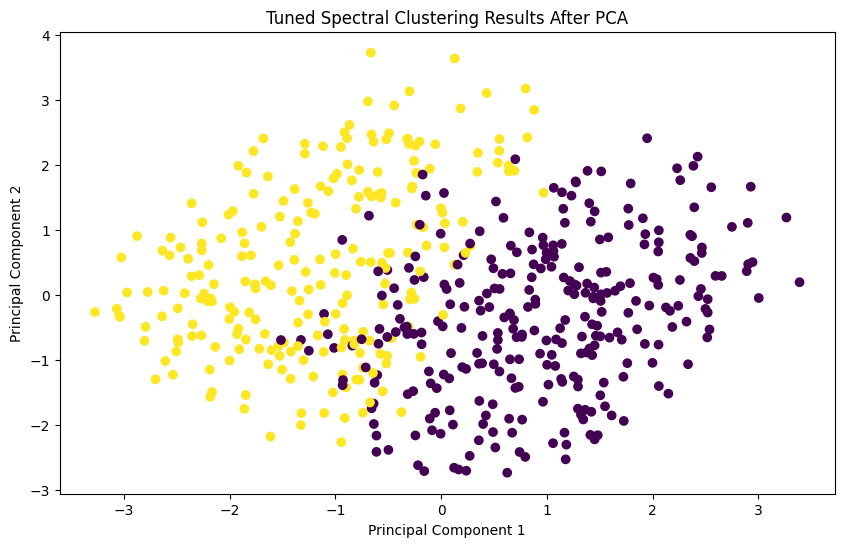

In [32]:
from sklearn.cluster import SpectralClustering
from sklearn.metrics import silhouette_score, make_scorer
from sklearn.model_selection import GridSearchCV

# Step 1: Define a broader parameter grid for fine-tuning
param_grid = {
    'n_clusters': [2, 3, 4],
    'affinity': ['nearest_neighbors', 'rbf', 'poly'],
    'n_neighbors': [5, 10, 15],
    'eigen_solver': ['arpack', 'lobpcg', 'amg'],
    'assign_labels': ['kmeans', 'discretize'],
}

# Create a custom scorer for silhouette score
silhouette_scorer = make_scorer(silhouette_score, metric='euclidean')

# Step 2: Perform Grid Search with cross-validation
spectral = SpectralClustering(random_state=42)
grid_search = GridSearchCV(spectral, param_grid, scoring=silhouette_scorer, cv=5, n_jobs=-1)
grid_search.fit(women_df_pca)

# Best Spectral Clustering model from Grid Search
best_spectral = grid_search.best_estimator_
best_spectral_labels = best_spectral.fit_predict(women_df_pca)

# Step 3: Evaluate the Tuned Spectral Clustering Model
tuned_silhouette = silhouette_score(women_df_pca, best_spectral_labels)
tuned_db_score = davies_bouldin_score(women_df_pca, best_spectral_labels)
tuned_ch_score = calinski_harabasz_score(women_df_pca, best_spectral_labels)

print(f"Best Parameters for Spectral Clustering: {grid_search.best_params_}")
print(f"Tuned Spectral Clustering Silhouette Score: {tuned_silhouette}")
print(f"Tuned Spectral Clustering Davies-Bouldin Score: {tuned_db_score}")
print(f"Tuned Spectral Clustering Calinski-Harabasz Score: {tuned_ch_score}")

# Step 4: Visualize the clustering results
plt.figure(figsize=(10, 6))
plt.scatter(women_df_pca[:, 0], women_df_pca[:, 1], c=best_spectral_labels, cmap='viridis')
plt.title('Tuned Spectral Clustering Results After PCA')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()
